In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [23]:
# Create an empty list to store the DataFrames
dfs = []

N_sims = 1000

# Loop through the file names
for i in range(1, N_sims + 1):
    file_name = f'../data/values_estimation_blp_{i}.csv'  # Assuming the files are in CSV format
    
    # Read the file as a DataFrame
    df = pd.read_csv(file_name)
    
    # Add a simulation number column
    df['simulation_number'] = i
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

combined_df = combined_df[(combined_df['sigma_rcl'] >= 0.03)
                          & (combined_df['sigma_blp'] >= 0.03)
                          & (combined_df['a_blp'] >= -5)
                          & (combined_df['a_rcl'] >= -5)]






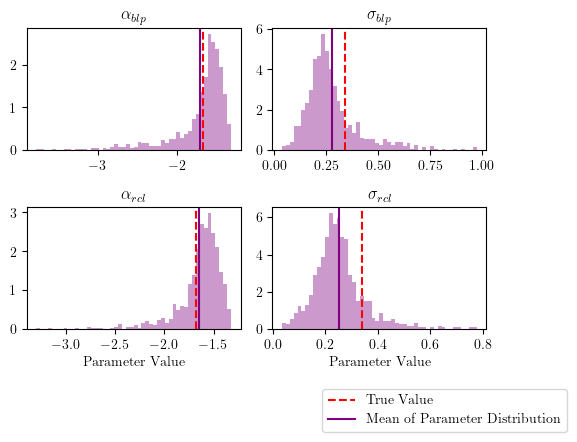

In [44]:

fig, ax = plt.subplots(2, 2, figsize=(6, 5))

purple_color = 'purple'

ax[0, 0].hist(combined_df['a_blp'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 0].axvline(-1.6820276496988864, color='red', linestyle='dashed')
ax[0, 0].axvline(np.mean(combined_df['a_blp']), color=purple_color)
ax[0, 0].set_title('$\\alpha_{blp}$')

ax[0, 1].hist(combined_df['sigma_blp'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 1].axvline(0.3397977879768558, color='red', linestyle='dashed')
ax[0, 1].axvline(np.mean(combined_df['sigma_blp']), color=purple_color)
ax[0, 1].set_title('$\\sigma_{blp}$')

ax[1, 0].hist(combined_df['a_rcl'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 0].axvline(-1.6820276496988864, color='red', linestyle='dashed')
ax[1, 0].axvline(np.mean(combined_df['a_rcl']), color=purple_color)
ax[1, 0].set_title('$\\alpha_{rcl}$')
ax[1, 0].set_xlabel('Parameter Value')


ax[1, 1].hist(combined_df['sigma_rcl'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 1].axvline(0.3397977879768558, color='red', linestyle='dashed')
ax[1, 1].axvline(np.mean(combined_df['sigma_rcl']), color=purple_color)
ax[1, 1].set_title('$\\sigma_{rcl}$')
ax[1, 1].set_xlabel('Parameter Value')

legend_elements = [
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='True Value'),
    plt.Line2D([0], [0], color=purple_color, label='Mean of Parameter Distribution')
]
leg = plt.legend(handles=legend_elements,
            loc='lower left',
            bbox_to_anchor=(0.2, -0.9))

# fig.subplots_adjust(bottom=0.78)
plt.tight_layout()

plt.savefig('../plots/estimation_results_demand_side.pdf')
plt.show()

In [25]:
combined_df.mean()


b2_ols                -0.296803
b3_ols                -0.296771
a_ols                 -1.306759
b1_ols                 1.175095
a_iv                  -1.322908
b2_iv                 -0.299655
b3_iv                 -0.299623
b1_iv                  1.268477
b1_blp                 2.175444
b2_blp                -0.301979
b3_blp                -0.301941
a_blp                 -1.713550
sigma_blp              0.278271
sigma_rcl              0.253979
a_rcl                 -1.644096
b2_rcl                -0.301386
b3_rcl                -0.301354
b1_rcl                 2.024542
simulation_number    502.445312
dtype: float64